## 40 多个时间序列 （Multiple Time Series）
您可以绘制多个时间序列，在同一图表上测量相同的值，如下所示。

In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.3
0.11.0


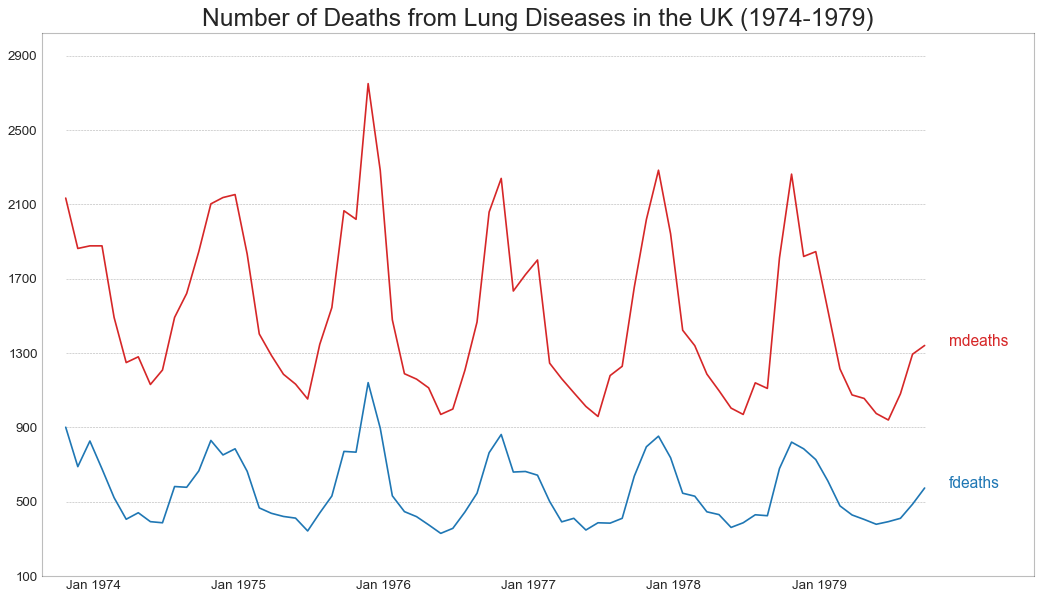

In [2]:
# Import Data
df = pd.read_csv('datasets/mortality.csv')

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 400
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):
    # 原文此处有误，Python数据之道 备注
    # 访问 liyangbit.com ， 查看本文完整内容
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()